In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix


In [2]:
# Train and Test data for 10000 rows

In [3]:
# load the first 10000 data from each dataset.
df_train_5000 = pd.read_csv("train.csv", nrows=5000) # header, column_names, nrows are some of the parameters while reading the file
df_test_5000 = pd.read_csv("test.csv", nrows=5002) # header, column_names, nrows are some of the parameters while reading the file

In [4]:
# Note: In Test Data, we are taking 5002 data as it contains 2 null values which will be verified later

In [5]:
# prints the first 5 rows of train data
df_train_5000.head()

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
# prints the first 5 rows of test data
df_test_5000.head()

,label,title,content
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


### EDA - Exploratory Data Analysis

In [7]:
# prints the count of each column in the train data
df_train_5000.count()

label      5000
title      5000
content    5000
dtype: int64

In [8]:
# prints the count of each column in the test data
df_test_5000.count()

label      5002
title      5000
content    5002
dtype: int64

In [9]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_train_5000['label'].value_counts()

label
0    2692
1    2308
Name: count, dtype: int64

In [10]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_test_5000['label'].value_counts()

label
1    2566
0    2436
Name: count, dtype: int64

In [11]:
# since the values are somewhat nearer and hence it is a balanced data

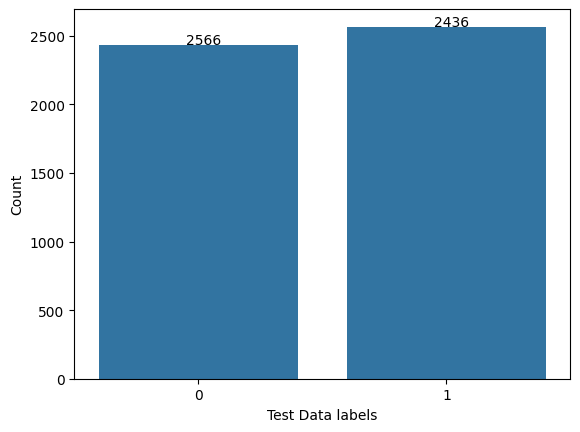

In [12]:
# plotting the countplot of label (target) in test data
ax = sns.countplot(x='label',data=df_test_5000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Test Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_test_5000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

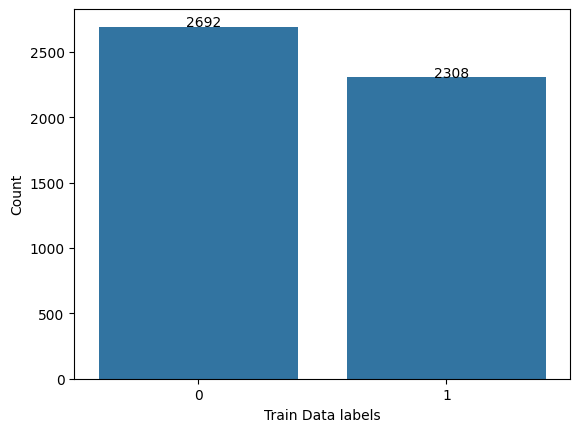

In [13]:
# plotting the countplot of label (target) in test data
ax=sns.countplot(x='label',data=df_train_5000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Train Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_train_5000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

In [14]:
# description of the train data
df_train_5000.describe(include = 'all')

,label,title,content
count,5000.000000,5000,5000
unique,NaN,4743,4999
top,NaN,Disappointing,The band was far too thin and would roll down ...
freq,NaN,16,2
mean,0.461600,NaN,NaN
std,0.498573,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [15]:
# description of the test data
df_test_5000.describe(include = 'all')

,label,title,content
count,5002.000000,5000,5002
unique,NaN,4795,5000
top,NaN,Disappointed,Rather pretentious comedy featuring Mel Gibson...
freq,NaN,17,2
mean,0.512995,NaN,NaN
std,0.499881,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,1.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [16]:
# Check for Null Values in the train data
df_train_5000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [17]:
# Check for Null Values in the test data
df_test_5000.isnull().sum()

label      0
title      2
content    0
dtype: int64

In [18]:
# There are no null values in the train data, however there are 2 null values in the test data

In [19]:
# Drop the null value data from the train data
df_test_5000.dropna(inplace=True)

In [20]:
# Check for Null Values in the train data
df_test_5000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [21]:
# prints the names of all the columns in the train data
df_train_5000.columns

Index(['label', 'title', 'content'], dtype='object')

In [22]:
# prints the names of all the columns in the test data
df_test_5000.columns

Index(['label', 'title', 'content'], dtype='object')

In [23]:
# create a new column named 'data_type' in the train data with value as "train"
df_train_5000['data_type'] = 'train'

# create a new column named 'data_type' in the test data with value as "test"
df_test_5000['data_type'] = 'test'

In [24]:
# prints the train data
df_train_5000

,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
4995,1,A MUST READ FOR ANYONE INTERESTED IN TRUE CRIM...,Last year I found this book and once I opened ...,train
4996,1,"Sheer madness, meticulously documented","Yes, all the reviews are correct: This is an e...",train
4997,1,The weirdest plot ever and it's all true.,I remember last year around Halloween I read a...,train
4998,1,the most exciting book i've ever read. i loved...,I thought this book was magnificent. The way V...,train


In [25]:
# prints the test data
df_test_5000

,label,title,content,data_type
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,test
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,test
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,test
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,test
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,test
...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test


In [26]:
# Concatenate the 2 data(test and train) along the rows (axis=0)
df = pd.concat([df_train_5000, df_test_5000], axis=0)
df


,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test


In [27]:
df['Cleaned_data']=df["title"]+" "+df['content']

In [28]:
df

,label,title,content,data_type,Cleaned_data
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,Stuning even for the non-gamer This sound trac...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,The best soundtrack ever to anything. I'm read...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,Amazing! This soundtrack is my favorite music ...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,Excellent Soundtrack I truly like this soundtr...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test,"Review of ""Treasure Island"" Stevenson's ""Treas..."
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test,Treasure Island I read this year's ago and lov...
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test,"Treasure Island I thought that ""Treasure Islan..."
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test,Booooooooooorrrrrrrring!!! I had to read this ...


In [29]:
# convert into lowercase and remove punctuations
import string
def cleantext(txt):
    txt = txt.lower()
    txt = ''.join(' ' if c in string.punctuation else c for c in txt)
    txt = txt.strip()
    # txt = txt.translate(str.maketrans('', '', string.punctuation))
    #txt = txt.translate('', string.punctuation)
    return txt


In [30]:
df['Cleaned_data'] = df.apply(lambda x: cleantext(x['Cleaned_data']),axis=1)
df

,label,title,content,data_type,Cleaned_data
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer this sound trac...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything i m read...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing this soundtrack is my favorite music ...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack i truly like this soundtr...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...
...,...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test,review of treasure island stevenson s treas...
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test,treasure island i read this year s ago and lov...
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test,treasure island i thought that treasure islan...
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test,booooooooooorrrrrrrring i had to read this ...


In [31]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Cleaned_data_new'] = df['Cleaned_data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df.columns)

Index(['label', 'title', 'content', 'data_type', 'Cleaned_data',
       'Cleaned_data_new'],
      dtype='object')


In [33]:
df

,label,title,content,data_type,Cleaned_data,Cleaned_data_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer this sound trac...,stuning even non gamer sound track beautiful p...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything i m read...,best soundtrack ever anything reading lot revi...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing this soundtrack is my favorite music ...,amazing soundtrack favorite music time hands i...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack i truly like this soundtr...,excellent soundtrack truly like soundtrack enj...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing played game kn...
...,...,...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test,review of treasure island stevenson s treas...,review treasure island stevenson treasure isla...
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test,treasure island i read this year s ago and lov...,treasure island read year ago loved enjoyed re...
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test,treasure island i thought that treasure islan...,treasure island thought treasure island good e...
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test,booooooooooorrrrrrrring i had to read this ...,booooooooooorrrrrrrring read 7th grade class g...


In [34]:
# when dealing with words -> Tf-idf is better
# when dealing with sentences -> glove vectorizer
# 

In [35]:
df["word_count"] = df["title"].apply(lambda x : len(str(x).split( )))
df["word_count_cleaned"] = df["Cleaned_data"].apply(lambda x : len(str(x).split( )))
df["word_count_cleaned_new"] = df["Cleaned_data_new"].apply(lambda x : len(str(x).split( )))
df

,label,title,content,data_type,Cleaned_data,Cleaned_data_new,word_count,word_count_cleaned,word_count_cleaned_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer this sound trac...,stuning even non gamer sound track beautiful p...,5,80,44
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything i m read...,best soundtrack ever anything reading lot revi...,6,102,46
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing this soundtrack is my favorite music ...,amazing soundtrack favorite music time hands i...,1,136,69
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack i truly like this soundtr...,excellent soundtrack truly like soundtrack enj...,2,122,75
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing played game kn...,10,90,46
...,...,...,...,...,...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test,review of treasure island stevenson s treas...,review treasure island stevenson treasure isla...,4,140,88
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test,treasure island i read this year s ago and lov...,treasure island read year ago loved enjoyed re...,2,30,15
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test,treasure island i thought that treasure islan...,treasure island thought treasure island good e...,2,130,50
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test,booooooooooorrrrrrrring i had to read this ...,booooooooooorrrrrrrring read 7th grade class g...,1,60,26


In [36]:
print(df["word_count_cleaned"].sum())

821115


In [37]:
df["word_count_cleaned_new"].sum()

408701

In [38]:
df["word_count"].sum()

43745

In [39]:
df

,label,title,content,data_type,Cleaned_data,Cleaned_data_new,word_count,word_count_cleaned,word_count_cleaned_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer this sound trac...,stuning even non gamer sound track beautiful p...,5,80,44
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything i m read...,best soundtrack ever anything reading lot revi...,6,102,46
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing this soundtrack is my favorite music ...,amazing soundtrack favorite music time hands i...,1,136,69
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack i truly like this soundtr...,excellent soundtrack truly like soundtrack enj...,2,122,75
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing played game kn...,10,90,46
...,...,...,...,...,...,...,...,...,...
4997,1,"Review of ""Treasure Island""","Stevenson's ""Treasure Island"" is remarkably we...",test,review of treasure island stevenson s treas...,review treasure island stevenson treasure isla...,4,140,88
4998,1,Treasure Island,I read this year's ago and loved it then. I en...,test,treasure island i read this year s ago and lov...,treasure island read year ago loved enjoyed re...,2,30,15
4999,1,Treasure Island,"I thought that ""Treasure Island"" was a very go...",test,treasure island i thought that treasure islan...,treasure island thought treasure island good e...,2,130,50
5000,0,Booooooooooorrrrrrrring!!!,I had to read this for a 7th grade class... I ...,test,booooooooooorrrrrrrring i had to read this ...,booooooooooorrrrrrrring read 7th grade class g...,1,60,26


# Count Vectorizer

In [40]:
vectorizer = CountVectorizer()
# This line creates an instance of the CountVectorizer class. 
# The CountVectorizer is used to convert a collection of text documents to a matrix of token counts. 
# It essentially transforms a set of text data into a format that can be used as input to a machine learning model.

x = vectorizer.fit_transform(df['Cleaned_data_new'])
# This method is used to both fit the vectorizer to the data (determine the vocabulary) 
# and transform the input data into a numerical format.
# In this case, we are fitting the vectorizer and transforming the 'title' column of the DataFrame.
# The result of the fit_transform operation is stored in the variable x

x=x.toarray()

In [41]:
x.shape

(10000, 32408)

In [42]:
# This method returns an array of feature names, which are the terms or words used in the vectorized representation of your data.
# It can be useful to inspect the features generated by the vectorizer, 
# especially if you want to understand which words or terms correspond to specific columns in your feature matrix.
# finally stores the value to y
y = vectorizer.get_feature_names_out()
y

array(['00', '000', '00000', ..., 'éviter', 'ít', 'única'], dtype=object)

In [43]:
y.shape

(32408,)

In [44]:

# stores the value of x and y into a dataframe
data_cleaned_data = pd.DataFrame(x,columns=y)
data_cleaned_data


,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzz,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_cleaned_data.shape

(10000, 32408)

In [46]:
# verify whether there are any columns with 0 values
for column in data_cleaned_data.columns:
    if (data_cleaned_data[column] == 0).all():
        print(f"The column {column} contains only zeros.")
data_cleaned_data
# # option 2
# data_cleaned_title = data_cleaned_title.loc[:, (data_cleaned_title != 0).any(axis=0)]

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzz,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data_cleaned_data.shape

(10000, 32408)

In [48]:
# Resetting the index of both DataFrames
data = data_cleaned_data.reset_index(drop=True)
df = df.reset_index(drop=True)

# Add a column named label_x to the data DataFrame with values from df label
data['label_x'] = df['label']
data

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única,label_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data['data_type_x'] =  df['data_type']
data

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única,label_x,data_type_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [50]:
# assign data from the dataframe 'data' whose 'data_type_x' column values is 'train'
train = data[data['data_type_x']=='train']
test = data[data['data_type_x']=='test']

In [51]:
print(test.shape,"test size")
print(train.shape,"train size")

(5000, 32410) test size
(5000, 32410) train size


In [52]:
# define X_train, X_test, y_train, y_test

X_train = train.loc[:, ~train.columns.isin(['label_x', 'data_type_x'])]
y_train = train['label_x']

X_test = test.loc[:, ~test.columns.isin(['label_x', 'data_type_x'])]
y_test = test['label_x']


In [53]:
print(X_train.shape,"Xtrain size")
print(y_train.shape,"ytrain size")
print(X_test.shape,"Xtest size")
print(y_test.shape,"ytest size")

(5000, 32408) Xtrain size
(5000,) ytrain size
(5000, 32408) Xtest size
(5000,) ytest size


In [54]:
# define logistic regression and fit it to X_train and y_train 
clf1 = LogisticRegression(random_state=7).fit(X_train,y_train)


In [55]:
# define RandomForest and fit it to X_train and y_train
clf2 = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train,y_train)


In [56]:
# define SVM and fit it to X_train and y_train
clf3 = svm.SVC(random_state=7,C=.1).fit(X_train,y_train)

In [57]:
# define Naive Bayes and fit it to X_train and y_train
clf4 = GaussianNB().fit(X_train,y_train)

In [58]:
# make predictions for logistice regression Algorithms
y_pred_1 = clf1.predict(X_test)


In [59]:
# make predictions for random forest Algorithms
y_pred_2 = clf2.predict(X_test)


In [60]:
# make predictions for SVC Algorithms
y_pred_3 = clf3.predict(X_test)

In [61]:
# make predictions for Naive Bayes Algorithms
y_pred_4 = clf4.predict(X_test)

In [62]:
# calculate the confusion matrix for each algorithm
conf1 = confusion_matrix(y_test,y_pred_1)
conf1

array([[2010,  425],
       [ 476, 2089]], dtype=int64)

In [63]:
conf2 = confusion_matrix(y_test,y_pred_2)
conf2

array([[2362,   73],
       [1655,  910]], dtype=int64)

In [64]:
conf3 = confusion_matrix(y_test,y_pred_3)
conf3

array([[2346,   89],
       [1860,  705]], dtype=int64)

In [65]:
conf4 = confusion_matrix(y_test,y_pred_4)
conf4

array([[1355, 1080],
       [ 821, 1744]], dtype=int64)

TP = conf[0][0]

FP = conf[1][0]

TN = conf[1][1]

FN = conf[0][1]

In [66]:
# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Accuracy = TruePositives + TrueNegatives / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# calculate the precision,recall and accuracy for logistic algorithm
p1 = conf1[0][0]/(conf1[0][0]+conf1[1][0])
r1 = conf1[0][0]/(conf1[0][0]+conf1[0][1])
a1 = (conf1[0][0] + conf1[1][1])/(conf1[0][0] + conf1[0][1] + conf1[1][0] + conf1[1][1])

# print the respective values for logistic algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1 * 100))
print("The recall value for Logistic Regression is: {:.2f} %".format(r1 * 100))
print("The accuracy value for Logistic Regression is: {:.2f} %".format(a1 * 100))


The precision value for Logistic Regression is: 80.85 %
The recall value for Logistic Regression is: 82.55 %
The accuracy value for Logistic Regression is: 81.98 %


In [67]:
# calculate the precision,recall and accuracy for random forest algorithm
p2 = conf2[0][0]/(conf2[0][0]+conf2[1][0])
r2 = conf2[0][0]/(conf2[0][0]+conf2[0][1])
a2 = (conf2[0][0] + conf2[1][1])/(conf2[0][0] + conf2[0][1] + conf2[1][0] + conf2[1][1])

# print the respective values for random forest algorithm
print("The precision value for Random Forest is: {:.2f} %".format(p2 * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2 * 100))
print("The accuracy value for Random Forest is: {:.2f} %".format(a2 * 100))


The precision value for Random Forest is: 58.80 %
The recall value for Random Forest is: 97.00 %
The accuracy value for Random Forest is: 65.44 %


In [68]:
# calculate the precision,recall and accuracy for SVC algorithm
p3 = conf3[0][0]/(conf3[0][0]+conf3[1][0])
r3 = conf3[0][0]/(conf3[0][0]+conf3[0][1])
a3 = (conf3[0][0] + conf3[1][1])/(conf3[0][0] + conf3[0][1] + conf3[1][0] + conf3[1][1])

# print the respective values for SVC algorithm
print("The precision value for SVM is: {:.2f} %".format(p3 * 100))
print("The recall value for SVM is: {:.2f} %".format(r3 * 100))
print("The accuracy value for SVM is: {:.2f} %".format(a3 * 100))

The precision value for SVM is: 55.78 %
The recall value for SVM is: 96.34 %
The accuracy value for SVM is: 61.02 %


In [69]:
# calculate the precision,recall and accuracy for Naive Bayes algorithm
p4 = conf4[0][0]/(conf4[0][0]+conf4[1][0])
r4 = conf4[0][0]/(conf4[0][0]+conf4[0][1])
a4 = (conf4[0][0] + conf4[1][1])/(conf4[0][0] + conf4[0][1] + conf4[1][0] + conf4[1][1])

# print the respective values for SVC algorithm
print("The precision value for Naive Bayes is: {:.2f} %".format(p4 * 100))
print("The recall value for Naive Bayes is: {:.2f} %".format(r4 * 100))
print("The accuracy value for Naive Bayes is: {:.2f} %".format(a4 * 100))

The precision value for Naive Bayes is: 62.27 %
The recall value for Naive Bayes is: 55.65 %
The accuracy value for Naive Bayes is: 61.98 %


## Tf-Idf Vectorizer

In [70]:
# create an instance of the TfidfVectorizer class. 
vectorizer = TfidfVectorizer()

x_vect = vectorizer.fit_transform(df['Cleaned_data_new'])

# convert the x-vect into array format
x_vect = x_vect.toarray()

y_vect = vectorizer.get_feature_names_out()


In [71]:
# stores the value of x_vect and y_vect into a dataframe
data_vect = pd.DataFrame(x_vect,columns = y_vect)
data_vect

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzz,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Add a column named label_x to the data_vect dataframe with values from df label 
data_vect['label_x'] = df['label']
data_vect


,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única,label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
# checking for null values in data_vect dataframe
data_vect.isnull().sum()

00         0
000        0
00000      0
00290      0
007        0
          ..
ésta       0
éviter     0
ít         0
única      0
label_x    0
Length: 32409, dtype: int64

In [74]:
# verify whether there are any columns with 0 values
for column in data_vect.columns:
    if (data_vect[column] == 0).all():
        print(f"The column {column} contains only zeros.")
data_vect
# # option 2
# data_cleaned_title = data_cleaned_title.loc[:, (data_cleaned_title != 0).any(axis=0)]

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única,label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [75]:
# Add a column named data_type_x to the data_vect dataframe with values from df data_type
data_vect['data_type_x'] =  df['data_type']
data_vect

,00,000,00000,00290,007,0070412901,0072316373,008,00yeah,01,...,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz,él,ésta,éviter,ít,única,label_x,data_type_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test


In [76]:
# assign data from the dataframe 'data_vect' whose 'data_type_x' column values is 'train'
train_vect = data_vect[data_vect['data_type_x']=='train']
test_vect = data_vect[data_vect['data_type_x']=='test']


In [77]:
# Define X_train_vect, y_train_vect, X_test_vect, y_test_vect

X_train_vect = train_vect.loc[:, ~train_vect.columns.isin(['label_x', 'data_type_x'])]
y_train_vect = train_vect['label_x']

X_test_vect = test_vect.loc[:, ~test_vect.columns.isin(['label_x', 'data_type_x'])]
y_test_vect = test_vect['label_x']


In [78]:
# print the shape of X_train_vect and X_test_vect
print(X_train_vect.shape,"Xtrain shape")
print(X_test_vect.shape,"Xtest shape")
# print the shape of y_train_vect and y_test_vect
print(y_train_vect.shape,"ytrain shape")
print(y_test_vect.shape,"ytest shape")

(5000, 32408) Xtrain shape
(5000, 32408) Xtest shape
(5000,) ytrain shape
(5000,) ytest shape


In [79]:
# define logistic regression and fit it to X_train_vect and y_train_vect 
clf1_vect = LogisticRegression(random_state=7).fit(X_train_vect,y_train_vect)

In [80]:
# define Random Forest and fit it to X_train_vect and y_train_vect
clf2_vect = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train_vect,y_train_vect)

In [81]:
# define SVM and fit it to X_train_vect and y_train_vect
clf3_vect = svm.SVC(random_state=7,C=.1).fit(X_train_vect,y_train_vect)

In [82]:
# define Naive Bayes and fit it to X_train and y_train
clf4_vect = GaussianNB().fit(X_train_vect,y_train_vect)

In [83]:
# Make predictions on X_test_vect for Logistice Regrsssion algorithm
y_pred_1_vect = clf1_vect.predict(X_test_vect)


In [84]:
# Make predictions on X_test_vect for random forest algorithm
y_pred_2_vect = clf2_vect.predict(X_test_vect)


In [85]:
# Make predictions on X_test_vect for SVC algorithm
y_pred_3_vect = clf3_vect.predict(X_test_vect)


In [86]:
# Make predictions on X_test_vect for Naive Bayes algorithm
y_pred_4_vect = clf4_vect.predict(X_test_vect)

In [87]:
# Confusion matrix for logistic regression algorithm
conf1_vect = confusion_matrix(y_test_vect,y_pred_1_vect)
conf1_vect

array([[2089,  346],
       [ 516, 2049]], dtype=int64)

In [88]:
# Confusion matrix for random forest algorithm
conf2_vect = confusion_matrix(y_test_vect,y_pred_2_vect)
conf2_vect

array([[2390,   45],
       [1765,  800]], dtype=int64)

In [89]:
# Confusion matrix for SVC algorithm
conf3_vect = confusion_matrix(y_test_vect,y_pred_3_vect)
conf3_vect

array([[2435,    0],
       [2559,    6]], dtype=int64)

In [90]:
# Confusion matrix for Naive bayes algorithm
conf4_vect = confusion_matrix(y_test_vect,y_pred_4_vect)
conf4_vect

array([[1490,  945],
       [ 978, 1587]], dtype=int64)

In [91]:
# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Accuracy = TruePositives + TrueNegatives / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# precision, recall and accuracy for logistic regression algorithm
p1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[1][0])
r1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[0][1])
a1_vect = (conf1_vect[0][0] + conf1_vect[1][1])/(conf1_vect[0][0] + conf1_vect[0][1] + conf1_vect[1][0] + conf1_vect[1][1])

# print the respective values for logistic regression algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1_vect * 100))
print("The recall value for Logistic Regression is: {:.2f} %".format(r1_vect * 100))
print("The accuracy value for Logistic Regression is: {:.2f} %".format(a1_vect * 100))


The precision value for Logistic Regression is: 80.19 %
The recall value for Logistic Regression is: 85.79 %
The accuracy value for Logistic Regression is: 82.76 %


In [92]:
# precision, recall and accuracy for Random Forest algorithm
p2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[1][0])
r2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[0][1])
a2_vect = (conf2_vect[0][0] + conf2_vect[1][1])/(conf2_vect[0][0] + conf2_vect[0][1] + conf2_vect[1][0] + conf2_vect[1][1])

# print the respective values for Random Forest algorithm
print("The precision value for Random Forest is: {:.2f} %".format(p2_vect * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2_vect * 100))
print("The accuracy value for Random Forest is: {:.2f} %".format(a2_vect * 100))


The precision value for Random Forest is: 57.52 %
The recall value for Random Forest is: 98.15 %
The accuracy value for Random Forest is: 63.80 %


In [93]:
# precision, recall and accuracy for SVC algorithm
p3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[1][0])
r3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[0][1])
a3_vect = (conf3_vect[0][0] + conf3_vect[1][1])/(conf3_vect[0][0] + conf3_vect[0][1] + conf3_vect[1][0] + conf3_vect[1][1])

# print the respective values for SVC algorithm
print("The precision value for SVM is: {:.2f} %".format(p3_vect * 100))
print("The recall value for SVM is: {:.2f} %".format(r3_vect * 100))
print("The accuracy value for SVM is: {:.2f} %".format(a3_vect * 100))


The precision value for SVM is: 48.76 %
The recall value for SVM is: 100.00 %
The accuracy value for SVM is: 48.82 %


In [94]:
# precision, recall and accuracy for Naive Bayes algorithm
p4_vect = conf4_vect[0][0]/(conf4_vect[0][0]+conf4_vect[1][0])
r4_vect = conf4_vect[0][0]/(conf4_vect[0][0]+conf4_vect[0][1])
a4_vect = (conf4_vect[0][0] + conf4_vect[1][1])/(conf4_vect[0][0] + conf4_vect[0][1] + conf4_vect[1][0] + conf4_vect[1][1])

# print the respective values for Naive Bayes algorithm
print("The precision value for Naive Bayes is: {:.2f} %".format(p4_vect * 100))
print("The recall value for Naive Bayes is: {:.2f} %".format(r4_vect * 100))
print("The accuracy value for Naive Bayes is: {:.2f} %".format(a4_vect * 100))


The precision value for Naive Bayes is: 60.37 %
The recall value for Naive Bayes is: 61.19 %
The accuracy value for Naive Bayes is: 61.54 %


# SUMMARY

In [95]:
!pip install tabulate


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from tabulate import tabulate

algorithms = ["Linear Regression", "Random Forest", "SVM","Naive Bayes"]
matrices = ["Precision", "Recall", "Accuracy"]
values = [
    [p1, p2, p3,p4],
    [r1, r2, r3,r4],  # Replace xx with actual values for Random Forest
    [a1, a2, a3,a4]
]

values2 = [
    [p1_vect, p2_vect, p3_vect,p4_vect],
    [r1_vect, r2_vect, r3_vect,r4_vect],  # Replace xx with actual values for Random Forest
    [a1_vect, a2_vect, a3_vect,a4_vect]
]


# Convert values to percentage format
percentage_values = [[f"{val*100:.2f}%" for val in row] for row in values]
percentage_values2 = [[f"{val*100:.2f}%" for val in row] for row in values2]

table = [
    [matrices[0], percentage_values[0][0], percentage_values[0][1], percentage_values[0][2], percentage_values[0][3]],
    [matrices[1], percentage_values[1][0], percentage_values[1][1], percentage_values[1][2], percentage_values[1][3]],
    [matrices[2], percentage_values[2][0], percentage_values[2][1], percentage_values[2][2], percentage_values[2][3]]
]

table2 = [
    [matrices[0], percentage_values2[0][0], percentage_values2[0][1], percentage_values2[0][2], percentage_values2[0][3]],
    [matrices[1], percentage_values2[1][0], percentage_values2[1][1], percentage_values2[1][2], percentage_values2[1][3]],
    [matrices[2], percentage_values2[2][0], percentage_values2[2][1], percentage_values2[2][2], percentage_values2[2][3]]
]

# Adding a title for the table
title = "Algorithm Performance Metrics for count vectorizer"
title2 = "Algorithm Performance Metrics for Tf-Idf vectorizer"

t = tabulate(table, tablefmt="fancy_grid", headers=algorithms)
t2 = tabulate(table2, tablefmt="fancy_grid", headers=algorithms)
print("\t",title)
print(t,"\n","*************************************************************")
print("\t",title2)
print(t2)


	 Algorithm Performance Metrics for count vectorizer
╒═══════════╤═════════════════════╤═════════════════╤════════╤═══════════════╕
│           │ Linear Regression   │ Random Forest   │ SVM    │ Naive Bayes   │
╞═══════════╪═════════════════════╪═════════════════╪════════╪═══════════════╡
│ Precision │ 80.85%              │ 58.80%          │ 55.78% │ 62.27%        │
├───────────┼─────────────────────┼─────────────────┼────────┼───────────────┤
│ Recall    │ 82.55%              │ 97.00%          │ 96.34% │ 55.65%        │
├───────────┼─────────────────────┼─────────────────┼────────┼───────────────┤
│ Accuracy  │ 81.98%              │ 65.44%          │ 61.02% │ 61.98%        │
╘═══════════╧═════════════════════╧═════════════════╧════════╧═══════════════╛ 
 *************************************************************
	 Algorithm Performance Metrics for Tf-Idf vectorizer
╒═══════════╤═════════════════════╤═════════════════╤═════════╤═══════════════╕
│           │ Linear Regression   │ Ra

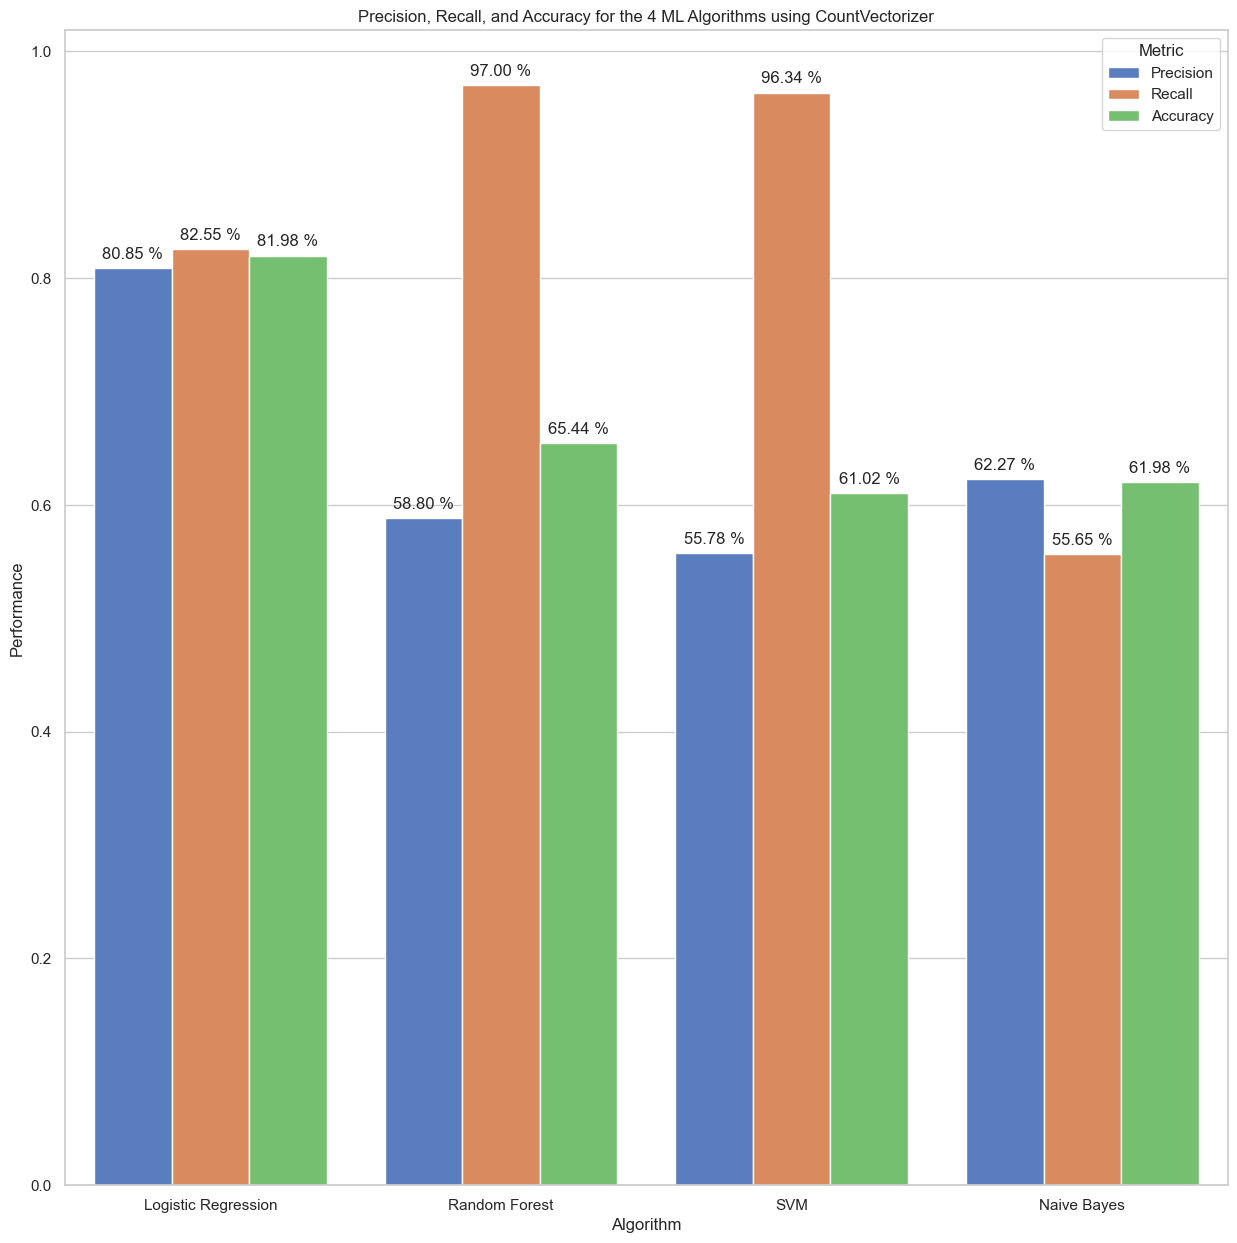

In [97]:
# Visualise the performance of the 4 algorithms for countvectorizer

# Define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']

# Define the precision, recall, and accuracy values obtained from the 3 algorithms.
precision_values = [p1, p2, p3, p4]
recall_values = [r1, r2, r3, r4]
accuracy_values = [a1, a2, a3, a4]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 3,
    'Metric': ['Precision'] * 4 + ['Recall'] * 4 + ['Accuracy'] * 4,
    'Value': precision_values + recall_values + accuracy_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 4 ML Algorithms using CountVectorizer')

# Show legend
plt.legend(title='Metric')

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

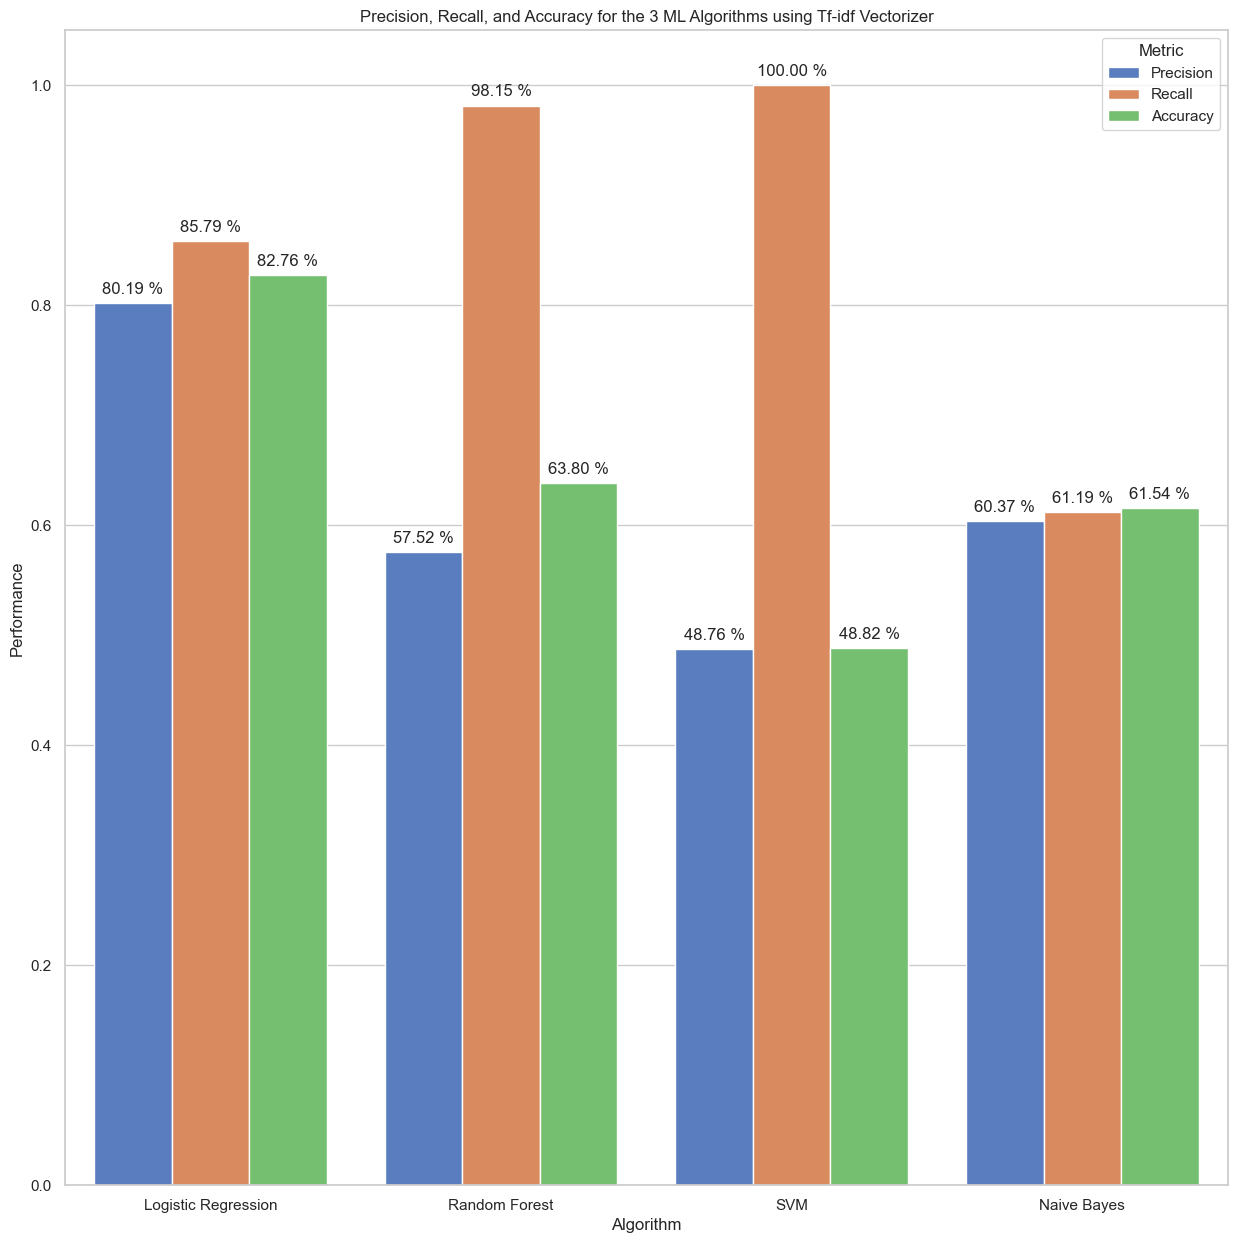

In [98]:
# Visualise the performance of the 3 algorithms for Tf-idf vectorizer

# Define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']

# Define the precision, recall, and accuracy values obtained from the 3 algorithms.
precision_values = [p1_vect, p2_vect, p3_vect, p4_vect]
recall_values = [r1_vect, r2_vect, r3_vect, r4_vect]
accuracy_values = [a1_vect, a2_vect, a3_vect, a4_vect]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 3,
    'Metric': ['Precision'] * 4 + ['Recall'] * 4 + ['Accuracy'] * 4,
    'Value': precision_values + recall_values + accuracy_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 3 ML Algorithms using Tf-idf Vectorizer')

# Show legend
plt.legend(title='Metric')

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

## ....................................................Thank You .........................................................